**Tarea 4**

*Brenda Villaseñor Feixas*

#Ej 1

1. Basado en el vídeo de Love Affairs (Unidad II), programar y ANALIZAR un modelo
dinámicos de su relación amorosa, siguiendo los siguientes pasos:

a) Planteamiento del sistema (de ecuaciones diferenciales).

b) Justificación de los Parámetros utilizados.

c) Bosquejo del sistema Dinámico.

d) Clasificación del Sistema (Estabilidad de puntos de equilibrio).

e) Análisis, interpretación de los resultados obtenidos según lo planteado en los
incisos (a), (b) y (c).

Este ejercicio de contener los siguientes puntos:

i) Librerías que se estén utilizando.

ii) Definición de los métodos numéricos como función: Euler y RK4. Definición
como función de la solución Analítica.

iii) Definición de bibliotecas de constantes que se estén utilizando.

iv) Definición del sistema que se va a estudiar F(X)

v) Gráfica de soluciones vs tiempo. Con una condición inicial que ustedes elijan.

vi) Gráfica del plano fase. Con una curva solución

vii) Análisis cualitativo con sympy que indique: nulclinas, puntos de equilibrio,
clasificación del los puntos de equilibrio, gráfica del plano fase con las nulclinas
y campo vectorial e interpretación biológica de lo observado.


viii) Comparación entre métodos Euler vs RK4, Analítica vs RK4, Analítica vs Eu-
ler. Dar análisis de los errores


In [ ]:
#importamos librerías
import numpy as np
import matplotlib.pylab as gr
import sympy as sm

##Biblioteca de parámetros y constantes

In [ ]:
#Definimos la Biblioteca de constantes
pars = {'a':-1, 'b':1, 'c':-1, 'd':-1, 't_i':0.0, 't_f':100,'h':0.01}


##Planteamiento del sistema (de ecuaciones diferenciales).

In [ ]:
#Definimos la función para la ecuación diferencial
def F_love(XX):
  J,B = XX
  dJ = pars['a']*J + pars['b']*B
  dB = pars['c']*J + pars['d']*B
  return np.array([dJ,dB])

###Justificación de los Parámetros utilizados.
[+] amor

[-] rechazo

- Brenda al inicio muy enamorada de José. B[0]>>1
- José muy indeciso. J[0]>0
- Si ambos reciben amor uno del otro, este aumenta.
- José trata de mantener la cantidad de amor al margen para no sobresaturar a la relación.
- Brenda es forza mucho que sucedan las cosas.
- José permite que fluyan las cosas.

Tenemos las siguientes ecuaciones:
$$dJ = aJ+bB$$
$$dB = cJ+dB$$

a,d : autorregulación
c,b : corregulación

a : negativo
b : positivo
c : negativo
d : negativa

La relación que llevan José y Brenda es muy dinámica. Se complementan en cuanto actitud y en vez de exceder en actitudes egoístas, predominan las actitudes de cuidado común.

###Análisis del sistema dinámico

##Método de Euler

In [ ]:
#creamos una función para el método de Euler
def Euler(ic,f,p):
    t = np.arange(p['t_i'],p['t_f'],p['h'])
    XX = np.zeros((len(t),len(ic)))

    XX[0] = ic
    for i in range(1,len(t)):
        XX[i] = XX[i-1]+p['h']*f(XX[i-1])
    return XX.transpose()

##Método RK4

In [ ]:
#Creamos una función para el método de Runge-Kutta de cuarto orden
def RK4(ic,f,p):
    t = np.arange(p['t_i'],p['t_f'],p['h'])
    XX = np.zeros((len(t),len(ic)))

    XX[0] = ic
    for i in range(1,len(t)):
        k1 = f(XX[i-1])*p['h']
        k2 = f(XX[i-1]+k1/2)*p['h']
        k3 = f(XX[i-1]+k2/2)*p['h']
        k4 = f(XX[i-1]+k3)*p['h']
        XX[i] = XX[i-1]+(k1+2*k2+2*k3+k4)/6
    return XX.transpose()

##Solución Analítica

In [ ]:
#Creamos una función para la solución analítica
def An(c1,c2,t_i,t_f,h, ic):

    t = np.arange(t_i,t_f,h)
    XX = np.zeros((len(t),len(ic)))

    a = np.array([-3/4,1])
    b = np.array([np.sqrt(7)/4,0])

    for i in range(0,len(t)):
        AA = c1*np.exp((1/4)*t[i])*(a*np.cos(t[i]*(np.sqrt(7)/4))-b*np.sin(t[i]*(np.sqrt(7)/4)))
        BB = c2*np.exp((1/4)*t[i])*(b*np.cos(t[i]*(np.sqrt(7)/4))+a*np.sin(t[i]*(np.sqrt(7)/4)))

        XX[i] = AA + BB

    return XX.transpose()

##Definición de ceroclinas

In [ ]:
#Definición de Ceroclinas
def J_Null(B):
    cc = - pars['b']/pars['a']*B
    return cc

def B_Null(J):
    cc = - pars['c']/pars['d']*J
    return cc

In [ ]:
#Vectores para obtener las Ceroclinas y poderlas graficar

J_array = np.arange(-1,1,0.01)
B_array = np.arange(-1,1,0.01)

In [ ]:
ic = [1,1]

J,B = RK4(ic,F_love,pars)

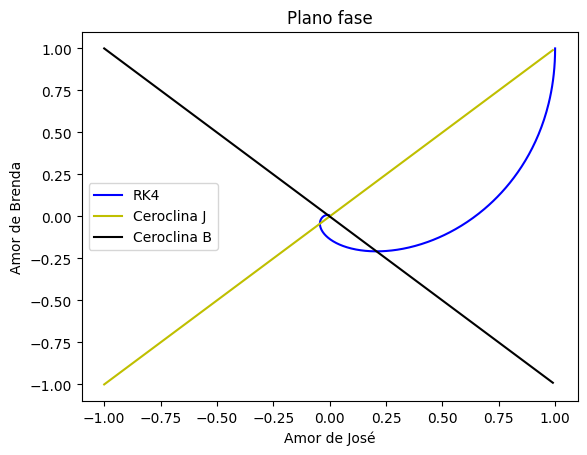

In [ ]:
gr.figure()
gr.plot(J,B,'b',label='RK4')
gr.plot(J_Null(B_array),B_array,'y', label='Ceroclina J')
gr.plot(J_array, B_Null(J_array),'k', label='Ceroclina B')
gr.title("Plano fase")
gr.xlabel("Amor de José")
gr.ylabel("Amor de Brenda")
gr.legend()
gr.show()

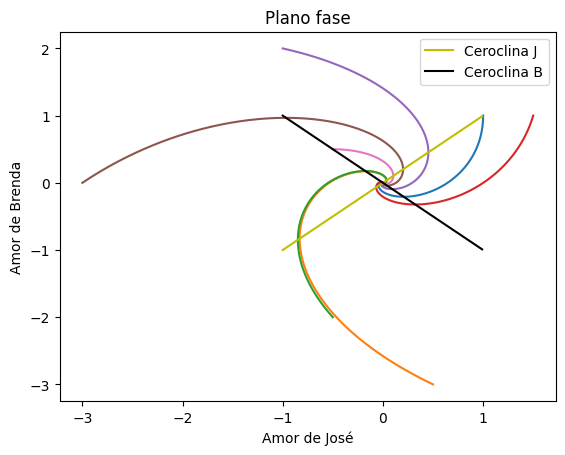

In [ ]:
ic = [[1,1],[0.5,-3],[-0.5,-2],[1.5,1],[-1,2],[-3,0],[-0.5,0.5]]
n = len(ic)

gr.figure()
for i in range(n):
    x,y = RK4(ic[i],F_love,pars)
    gr.plot(x,y)
    i = i+1

gr.plot(J_Null(B_array),B_array,'y', label='Ceroclina J')
gr.plot(J_array, B_Null(J_array),'k', label='Ceroclina B')
gr.title("Plano fase")
gr.xlabel("Amor de José")
gr.ylabel("Amor de Brenda")
gr.legend()
gr.show()

##Campo vectorial


<ipython-input-27-f1dfa9df1fd6>:19: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "y" (-> color=(0.75, 0.75, 0.0, 1)). The keyword argument will take precedence.
  gr.plot(J_Null(B_array),B_array,'y', label='Ceroclina J', color='blue',ls='--')
<ipython-input-27-f1dfa9df1fd6>:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  gr.plot(J_array, B_Null(J_array),'k', label='Ceroclina B', color='red',ls='--')


Text(0, 0.5, 'Amor de Brenda')

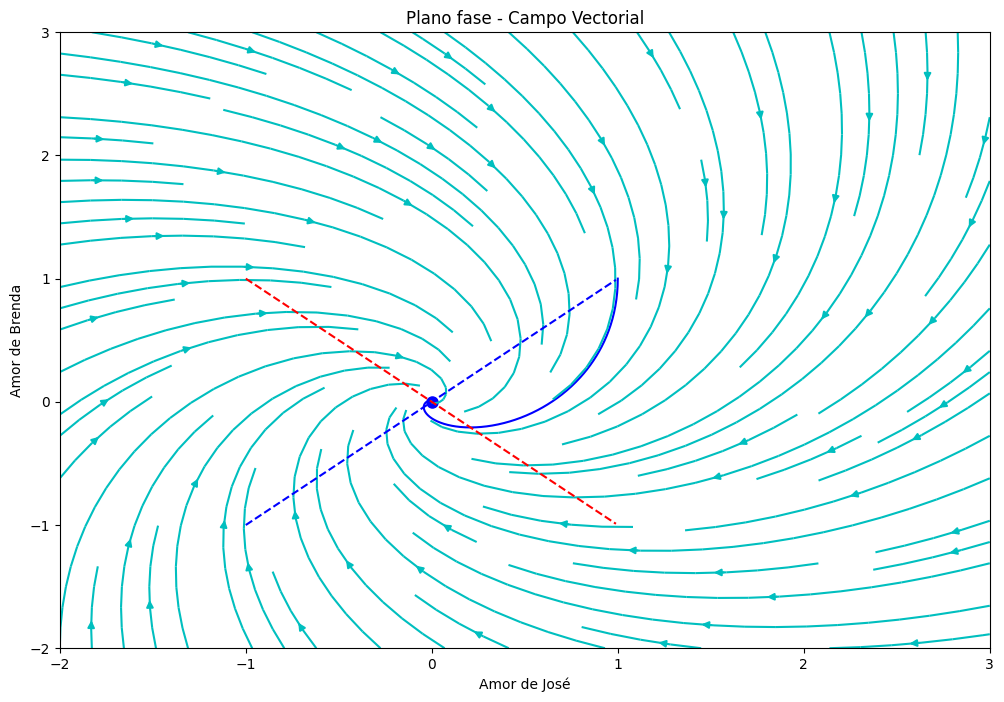

In [ ]:
Ji = np.linspace(-2,3,2000)
Bi = np.linspace(-2,3,5000)
Jx,By = np.meshgrid(Ji,Bi)


dJdt = pars['a']*Jx + pars['b']*By
dBdt = pars['c']*Jx + pars['d']*By

ic = [0,0]

gr.figure(figsize=(12,8))

#Trazamos la curva solución
gr.plot(J,B,color='blue')
gr.plot(ic[0], ic[1],'blue', marker = "o", markersize = 8.0)

#Trazamos el campo vectorial en
gr.streamplot(Jx,By,dJdt,dBdt,color='c')
gr.plot(J_Null(B_array),B_array,'y', label='Ceroclina J', color='blue',ls='--')
gr.plot(J_array, B_Null(J_array),'k', label='Ceroclina B', color='red',ls='--')
gr.title("Plano fase - Campo Vectorial")
gr.xlabel("Amor de José")
gr.ylabel("Amor de Brenda")

##Soluciones temporales

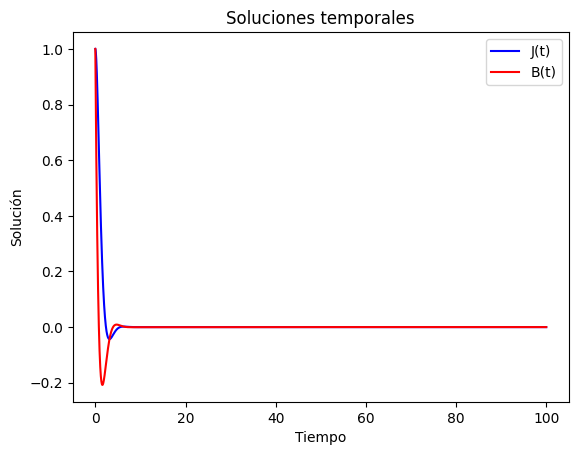

In [ ]:
#Soluciones temporales
t = np.arange(pars['t_i'],pars['t_f'],pars['h'])

gr.figure()
gr.plot(t,J,'b',label='J(t)')
gr.plot(t,B,'r',label='B(t)')
gr.title("Soluciones temporales")
gr.xlabel("Tiempo")
gr.ylabel("Solución")
gr.legend()
gr.show()

##Análisis con sympy

In [ ]:
#Cálculo de puntos de equilibrio
import sympy as sm
j,b = sm.symbols('j,b', negative=False)

dj = pars['a']*j + pars['b']*b
db = pars['c']*j + pars['d']*b

# igualamos a cero ambas ecuaciones
JEqual = sm.Eq(dj, 0)
BEqual = sm.Eq(db, 0)

#calculamos los puntos fijos
equilibrio = sm.solve( (JEqual, BEqual), j, b )
print('Los puntos fijos son:',equilibrio)

Los puntos fijos son: {b: 0, j: 0}


In [ ]:
#Importamos el método de Melissa para clasificar puntos de equilibrio
import matplotlib.patches as mpatches
markercolor = []
facecolor = []

def Clasificador(Equilibrio):
    #Escribimos las ecuaciones en forma matricial y calculamos su jacobiana
    eqMat = sm.Matrix([dj, db])
    Mat = sm.Matrix([j,b])
    jacMat = eqMat.jacobian(Mat)

    #Reescribimos los valores de Equilibrio
    pto1 = Equilibrio[j]
    pto2 = Equilibrio[b]

    #Substituye los puntos de equilibrio en la matriz jacobiana
    eqMat = jacMat.subs([(j, pto1),(b, pto2)])

    #Calcula los eigenvalores del sistema
    eige = list(eqMat.eigenvals())

    #calcula la traza
    traz = eqMat.trace()

    #Calcula el determinante
    deter = eqMat.det()

    #Factor delta para la clasificación
    Delta = traz**2 - 4*deter

    if len(eige) == 1: #si solo tenemos un eigenvalor, significa que es degenerado
        print("El punto fijo (%s,%s) tiene un eigenvalor %s degenerado de multiplicidad 2" %(pto1, pto2, eige))
    else:
        l1 = complex(eige[0])# convierte en complejos para mayor generalidad
        l2 = complex(eige[1])
        print ('Los valores propios para el punto fijo (%s, %s) son %s y %s, además' %(pto1, pto2, l1, l2))

    if traz == 0:#Clasifcacion de sistemas
        if deter > 0:
            print('El Equilibrio es un centro.')
            marker = 'y.'
            face = 'black'
            markercolor.append(marker)
            facecolor.append(face)
        elif deter < 0:
            print('El Equilibrio es un saddle node.')
            marker = 'r.'
            face = 'black'
            markercolor.append(marker)
            facecolor.append(face)
        else:
            print('El Equilibrio es una serie de puntos en el eje x.')
            marker = 'yv'
            face = 'black'
            markercolor.append(marker)
            facecolor.append(face)
    elif traz < 0:
        if deter >0:
            if Delta < 0:
                print('El Equilibrio es una espiral estable.')
                marker = 'ko'
                face = 'black'
                markercolor.append(marker)
                facecolor.append(face)
            elif Delta >0:
                print('El Equilibrio es un nodo estable.')
                marker = 'bo'
                face = 'black'
                markercolor.append(marker)
                facecolor.append(face)
            else:
                print('El Equilibrio es un nodo degenerado estable')
                marker = 'bv'
                face = 'black'
                markercolor.append(marker)
                facecolor.append(face)
        elif deter < 0:
            print('El Equilibrio es un Saddle Node')
            marker = 'r.'
            face = 'black'
            markercolor.append(marker)
            facecolor.append(face)
        else:
            print('El Equilibrio es una serie de puntos estables en el eje x.')
            marker = 'yv'
            face = 'black'
            markercolor.append(marker)
            facecolor.append(face)
    else:
        if deter > 0:
            if Delta <0:
                print('El Equilibrio es una espiral inestable.')
                marker = 'bo'
                face = 'none'
                markercolor.append(marker)
                facecolor.append(face)
            elif Delta >0:
                print('El Equilibrio es un nodo inestable.')
                marker = 'ko'
                face = 'none'
                markercolor.append(marker)
                facecolor.append(face)
            else:
                print('El Equilibrio es un nodo degenerado inestable.')
                marker = 'bv'
                face = 'none'
                markercolor.append(marker)
                facecolor.append(face)
        elif deter < 0:
            print('El Equilibrio es un Saddle Node')
            marker = 'r.'
            face = 'black'
            markercolor.append(marker)
            facecolor.append(face)
        else:
            print('El Equilibrio es una serie de puntos estables en el eje x.')
            marker = 'yv'
            face = 'black'
            markercolor.append(marker)
            facecolor.append(face)
    return

In [ ]:
#Imprimimos la clasificación de los puntos de equilibrio
print('La clasificación de los puntos de equilibrio es la siguiente: ',Clasificador(equilibrio) )

Los valores propios para el punto fijo (0.0, 0.0) son (0.75-1.3919410907075054j) y (0.75+1.3919410907075054j), además
El Equilibrio es una espiral inestable.
La clasificación de los puntos de equilibrio es la siguiente:  None


##Comparación entre métodos

In [ ]:
ic = [1,1]

J_rk4,B_rk4 = RK4(ic,F_love,pars)
J_e,B_e = Euler(ic,F_love,pars)

c1=np.exp(complex(1,3))/2
c2 = np.exp(complex(1,1))/2

tinit = pars['t_i']
tfinal = pars['t_f']
h= pars['h']

J_a,B_a = An(c1,c2,pars['t_i'],pars['t_f'],pars['h'],ic)
#J_a,B_a = An(c1,c2,pars['t_i'],10,h,ic)

<ipython-input-6-e1c9c91d9c9f>:14: ComplexWarning: Casting complex values to real discards the imaginary part
  XX[i] = AA + BB


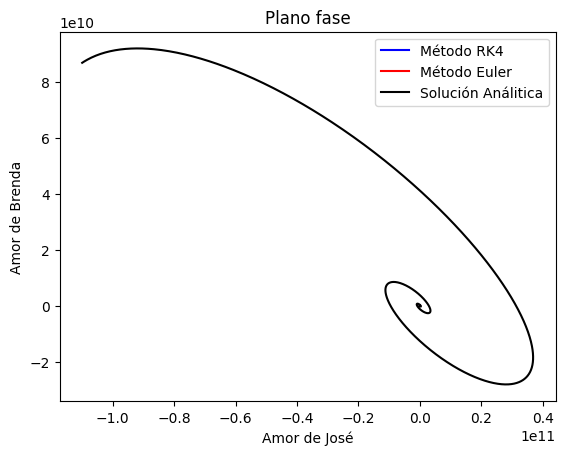

In [ ]:
gr.figure()
gr.plot(J_rk4,B_rk4,'b',label='Método RK4')
gr.plot(J_e,B_e,'r',label='Método Euler')
gr.plot(J_a,B_a,'k',label='Solución Análitica')
gr.title("Plano fase")
gr.xlabel("Amor de José")
gr.ylabel("Amor de Brenda")
gr.legend()
gr.show()

No se logran observar las soluciones numéricas dado que el rango en el que están definidas es mucho menor a la solución analítica.

###Errores

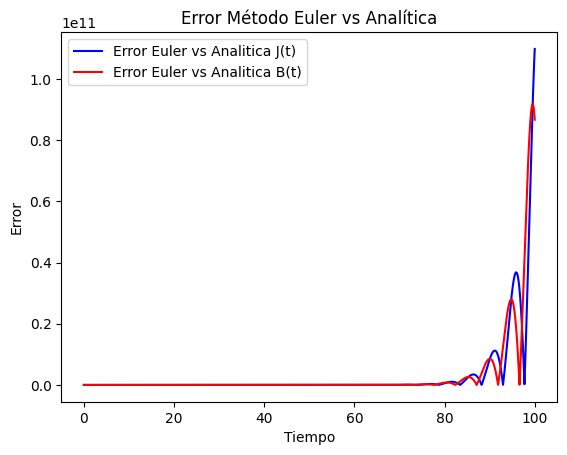

In [ ]:
#Error Euler vs Analitica
t = np.arange(pars['t_i'],pars['t_f'],h)

Error1_J = abs(J_e-J_a)
Error1_B = abs(B_e-B_a)

gr.figure()
gr.plot(t,Error1_J,'b',label='Error Euler vs Analitica J(t)')
gr.plot(t,Error1_B,'r',label='Error Euler vs Analitica B(t)')
gr.title("Error Método Euler vs Analítica")
gr.xlabel("Tiempo")
gr.ylabel("Error")
gr.legend()
gr.show()

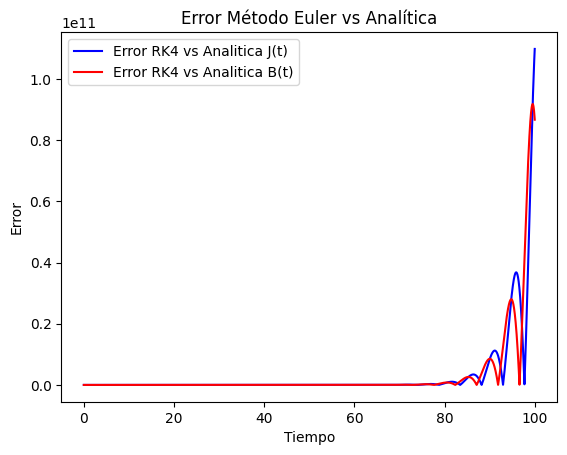

In [ ]:
#Error RK4 vs Analitica
t = np.arange(pars['t_i'],pars['t_f'],h)

Error2_J = abs(J_rk4-J_a)
Error2_B = abs(B_rk4-B_a)

gr.figure()
gr.plot(t,Error2_J,'b',label='Error RK4 vs Analitica J(t)')
gr.plot(t,Error2_B,'r',label='Error RK4 vs Analitica B(t)')
gr.title("Error Método Euler vs Analítica")
gr.xlabel("Tiempo")
gr.ylabel("Error")
gr.legend()
gr.show()

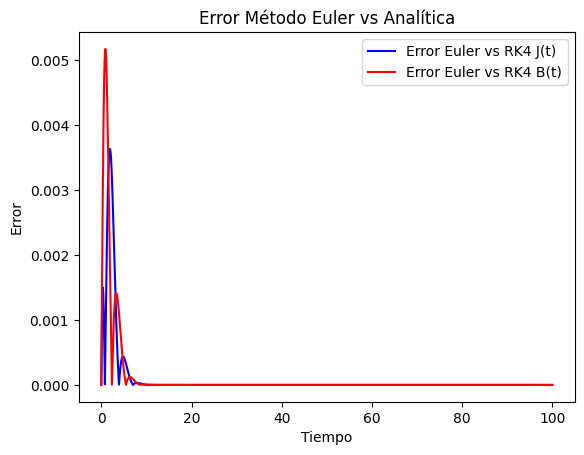

In [ ]:
#Error Euler vs RK4
t = np.arange(pars['t_i'],pars['t_f'],h)

Error3_J = abs(J_e-J_rk4)
Error3_B = abs(B_e-B_rk4)

gr.figure()
gr.plot(t,Error3_J,'b',label='Error Euler vs RK4 J(t)')
gr.plot(t,Error3_B,'r',label='Error Euler vs RK4 B(t)')
gr.title("Error Método Euler vs Analítica")
gr.xlabel("Tiempo")
gr.ylabel("Error")
gr.legend()
gr.show()

#Ej 2

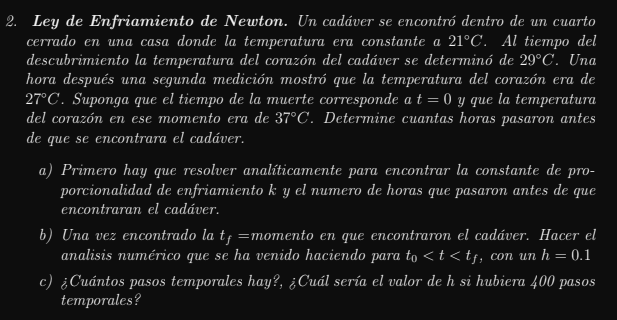

In [ ]:
#importamos librerías
import numpy as np
import matplotlib.pylab as gr

##Función del ejercicio

In [ ]:
#Definimos la función para la ecuación diferencial de la Ley de enfriamiento de Newton
def f(t, T):
    return -k*(T - T_a)

##Damos valores a los parámetros

In [ ]:
#Definimos parámetros
F = f
h = 0.1
T_a = 21
k = np.log(4/3)
Y_i = 37
t_i = 0
t_f = np.log(8/3)

In [ ]:
print('Pasaron ',t_f , ' horas antes de encontrar al cadaver.')

Pasaron  0.9808292530117262  horas antes de encontrar al cadaver.


In [ ]:
print('Hay ',(t_f - t_i)/h, ' pasos temporales.')

Hay  9.808292530117262  pasos temporales.


In [ ]:
print('Si hubiera 400 pasos temporales, el valor de h sería: ',(t_f-t_i)/400)

Si hubiera 400 pasos temporales, el valor de h sería:  0.0024520731325293156


## Método de Euler

In [ ]:
#creamos una función para el método de Euler
def Euler_2(h,t_i,t_f,Y_i,F):
  #definimos el número de pasos
  N = int((t_f-t_i)/h)
  #creamos la malla de tiempo
  t = np.linspace(t_i,t_f,N+1)
  #creamos la malla de la solución
  Y = np.zeros(N+1)
  #condiciones iniciales
  Y[0]= Y_i

  #Llenamos el arreglo con valores correspondientes a la función con el método de Eule
  for i in range(N):
    Y[i+1]=h*F(t[i],Y[i]) +Y[i]

  return np.array([t,Y])

##Método de RK4

In [ ]:
#creamos una función para el método de RK4
def RK4_2(h,t_i,t_f,Y_i,F):
  #definimos el número de pasos
  N = int((t_f-t_i)/h)
  #creamos la malla de tiempo
  t = np.linspace(t_i,t_f,N+1)
  #creamos la malla de la solución
  Y = np.zeros(N+1)
  #condiciones iniciales
  Y[0]= Y_i

  #Llenamos el arreglo con valores correspondientes a la función con el método de RK4
  for i in range(N):
    k1 = F(t[i],Y[i])
    k2 = F(t[i]+h/2,Y[i]+h/2*k1)
    k3 = F(t[i]+h/2,Y[i]+h/2*k2)
    k4 = F(t[i]+h/2,Y[i]+h/2*k3)

    Y[i+1]=(k1+2*k2+2*k3+k4)/6 +Y[i]

  return np.array([t,Y])

##Solución analítica

In [ ]:
#definimos la solución analítica
def T(h,t_f,t_i):
  #definimos el número de pasos
  N = int((t_f-t_i)/h)
  #creamos la malla de tiempo
  t = np.linspace(t_i,t_f,N+1)
  #creamos la malla de la solución
  Y = np.zeros(N+1)
  #condiciones iniciales
  Y[0]= Y_i
  #Llenamos la solucion analítica
  for i in range(N):
    Y[i]= 21 + (Y_i-21)*np.exp(-np.log(4/3)*i)

  return np.array([t,Y])

## RK4 vs Euler

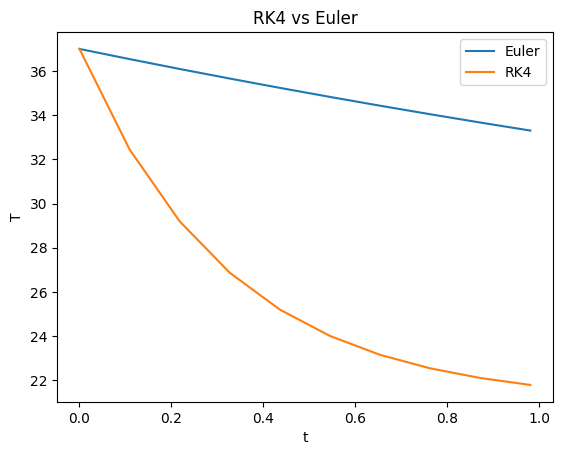

In [ ]:
#graficamos rk4 vs euler
t,Y = Euler_2(h,t_i,t_f,Y_i,F)
gr.plot(t,Y,label='Euler')
t,Y = RK4_2(h,t_i,t_f,Y_i,F)
gr.plot(t,Y,label='RK4')
gr.xlabel('t')
gr.ylabel('T')
gr.title('RK4 vs Euler')
gr.legend()
gr.show()

No obstante, si nos alejamos en el tiempo, las soluciones Euler y numérica RK4 sí se parecen:

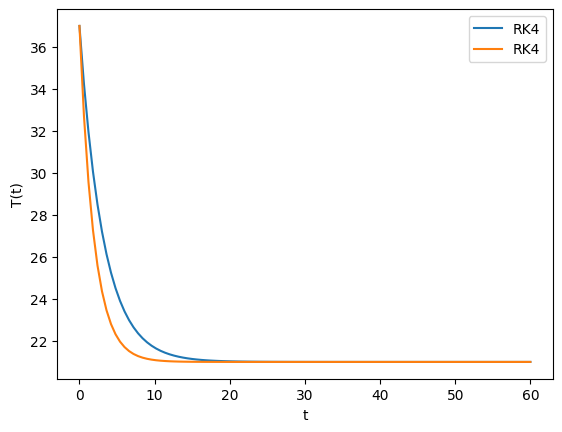

In [ ]:
#graficamos la solución RK4 y la Euler
t, y = Euler_2(0.6,0,60,Y_i,f)
gr.plot(t, y, label='RK4')
t, y = RK4_2(0.6,0,60,Y_i,f)
gr.plot(t, y, label='RK4')
gr.xlabel('t')
gr.ylabel('T(t)')
gr.legend()
gr.show()

###Error

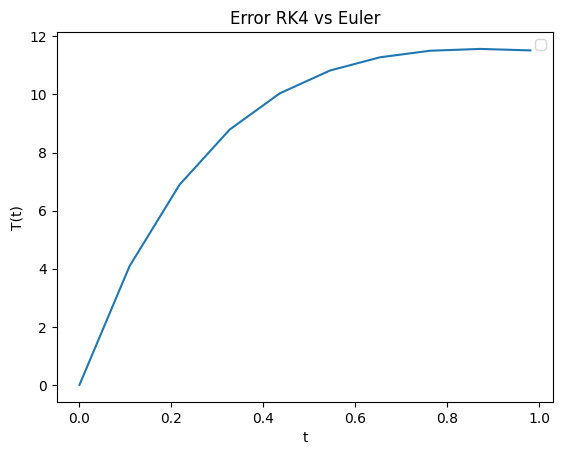

In [ ]:
#Graficamos el error
t,Y = RK4_2(h,t_i,t_f,Y_i,f)
t,Y_1 = Euler_2(h,t_i,t_f,Y_i,f)
error_2=np.abs(Y-Y_1)
gr.plot(t,error_2)
gr.xlabel('t')
gr.ylabel('T(t)')
gr.legend()
gr.title('Error RK4 vs Euler')
gr.show()

Observamos que el error crece, pero se asienta en un valor de 12, por lo que en tiempos mayores las soluciones de ambos métodos se aproximarán entre sí y se podrá utilizar cuallquiera para resolver el problema.

## Analítica vs Euler

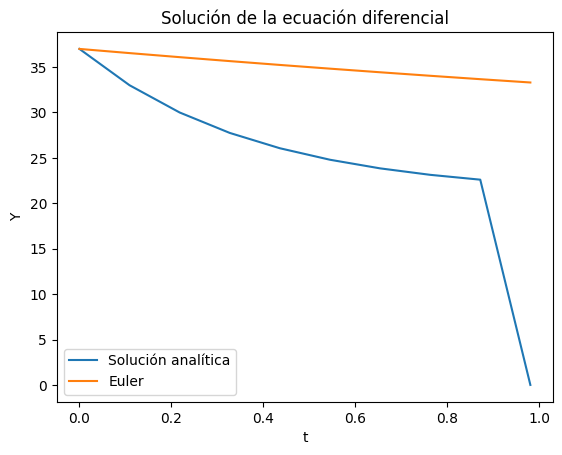

In [ ]:
t, Y_a = T(h,t_f,t_i)
gr.plot(t,Y_a,label='Solución analítica')
t,Y = Euler_2(h,t_i,t_f,Y_i,F)
gr.plot(t,Y,label='Euler')
gr.xlabel('t')
gr.ylabel('Y')
gr.title('Solución de la ecuación diferencial')
gr.legend()
gr.show()

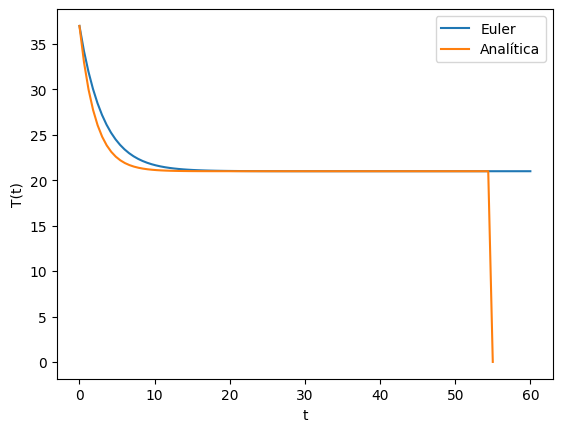

In [ ]:
#graficamos la solución Analítica y la Euler
t, y = Euler_2(0.6,0,60,Y_i,f)
gr.plot(t, y, label='Euler')
t, y = T(0.6,55,0)
gr.plot(t, y, label='Analítica')
gr.xlabel('t')
gr.ylabel('T(t)')
gr.legend()
gr.show()

###Error

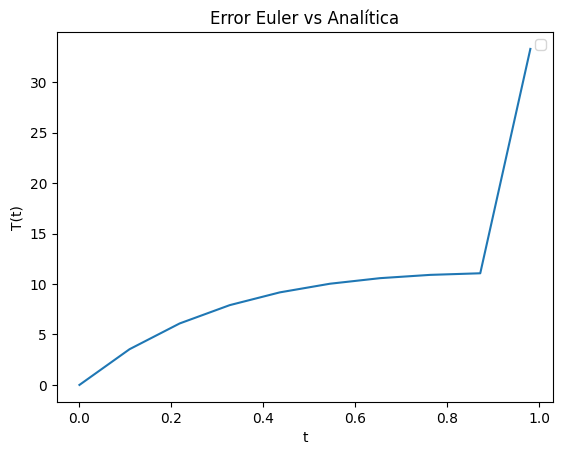

In [ ]:
#Graficamos el error
t,Y = Euler_2(h,t_i,t_f,Y_i,f)
t,Y_a = T(h,t_f,t_i)
error_2=np.abs(Y-Y_a)
gr.plot(t,error_2)
gr.xlabel('t')
gr.ylabel('T(t)')
gr.legend()
gr.title('Error Euler vs Analítica')
gr.show()

##Analítica vs RK4

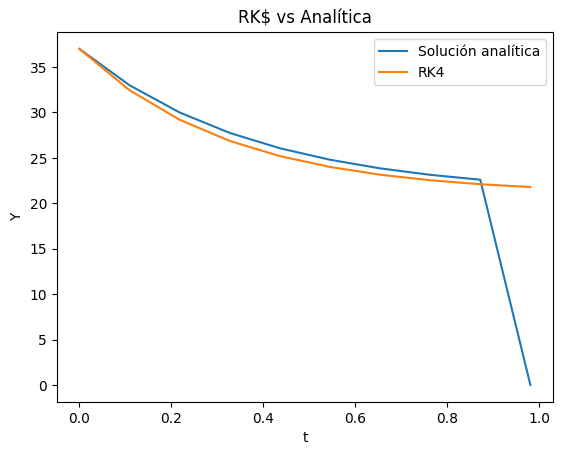

In [ ]:
t, Y_a = T(h,t_f,t_i)
gr.plot(t,Y_a,label='Solución analítica')
t,Y = RK4_2(h,t_i,t_f,Y_i,f)
gr.plot(t,Y,label='RK4')
gr.xlabel('t')
gr.ylabel('Y')
gr.title('RK$ vs Analítica')
gr.legend()
gr.show()

No obstante, si nos alejamos en el tiempo, las soluciones analítica y numérica RK4 sí se parecen:

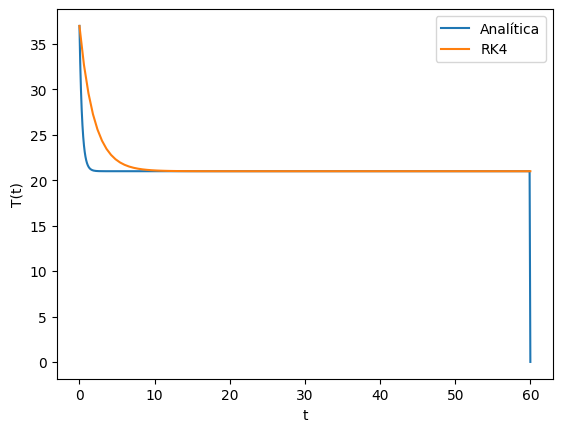

In [ ]:
#graficamos la solución analítica y la solución numérica
t, Y_a = T(h,60,0)
gr.plot(t,Y_a, label='Analítica')
t, y = RK4_2(0.6,0,60,Y_i,f)
gr.plot(t, y, label='RK4')
gr.xlabel('t')
gr.ylabel('T(t)')
gr.legend()
gr.show()

###Error

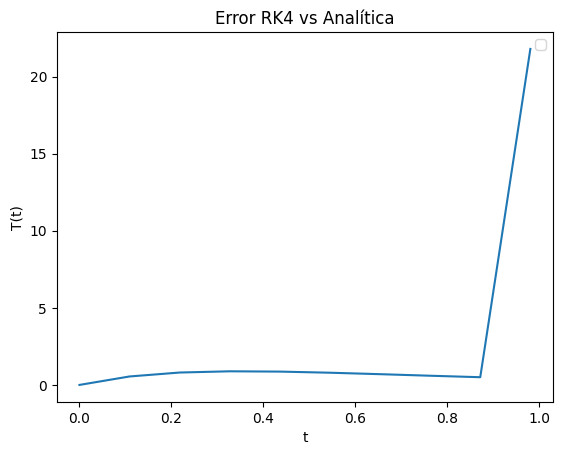

In [ ]:
#Graficamos el error
t,Y = RK4_2(h,t_i,t_f,Y_i,f)
t, Y_a = T(h,t_f,t_i)
error_2=np.abs(Y-Y_a)
gr.plot(t,error_2)
gr.xlabel('t')
gr.ylabel('T(t)')
gr.legend()
gr.title('Error RK4 vs Analítica')
gr.show()

#Ej 3

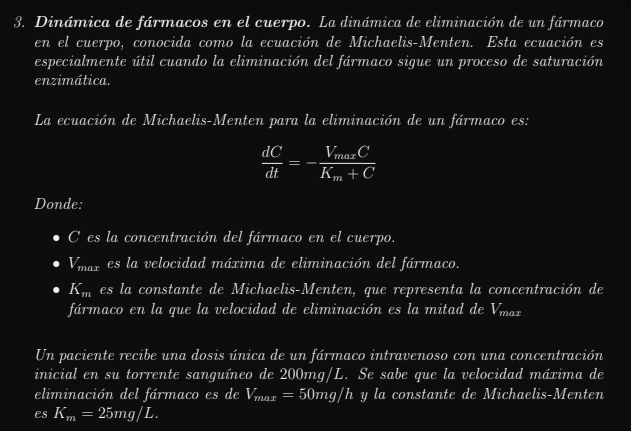

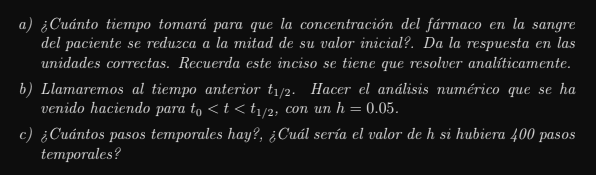

In [ ]:
#importamos librerías
import numpy as np
import matplotlib.pylab as gr

##Función del ejercicio

In [ ]:
#Definimos la función para la ecuación diferencial
def F_3(t,C):
  return -v*C/(K+C)

##Damos valores a los parámetros

In [ ]:
#Definimos parámetros
F = F_3
Y_i = 200
v = 50
K = 25
t_i = 0
t_f = 2.3465
h = 0.05
C0= Y_i

##Método de Euler

In [ ]:
#creamos una función para el método de Euler
def Euler_3(h,t_i,t_f,Y_i,F):
  #definimos el número de pasos
  N = int((t_f-t_i)/h)
  #creamos la malla de tiempo
  t = np.linspace(t_i,t_f,N+1)
  #creamos la malla de la solución
  Y = np.zeros(N+1)
  #condiciones iniciales
  Y[0]= Y_i

  #Llenamos el arreglo con valores correspondientes a la función con el método de Eule
  for i in range(N):
    Y[i+1]=h*F(t[i],Y[i]) +Y[i]

  return np.array([t,Y])

##Método RK4

In [ ]:
#creamos una función para el método de RK4
def RK4_3(h,t_i,t_f,Y_i,F):
  #definimos el número de pasos
  N = int((t_f-t_i)/h)
  #creamos la malla de tiempo
  t = np.linspace(t_i,t_f,N+1)
  #creamos la malla de la solución
  Y = np.zeros(N+1)
  #condiciones iniciales
  Y[0]= Y_i

  #Llenamos el arreglo con valores correspondientes a la función con el método de RK4
  for i in range(N):
    k1 = F(t[i],Y[i])
    k2 = F(t[i]+h/2,Y[i]+h/2*k1)
    k3 = F(t[i]+h/2,Y[i]+h/2*k2)
    k4 = F(t[i]+h/2,Y[i]+h/2*k3)

    Y[i+1]=(k1+2*k2+2*k3+k4)/6 +Y[i]

  return np.array([t,Y])

##Solución analítica

In [ ]:
#creamos una función para la solución analítica
def An_3(h,t_i,t_f,Y_i):
  #definimos el número de pasos
  N = int((t_f-t_i)/h)
  #creamos la malla de tiempo
  t = np.linspace(t_i,t_f,N+1)
  #creamos la malla de la solución
  Y = np.zeros(N+1)
  #condiciones iniciales
  Y[0]= Y_i

  #Llenamos el arreglo con valores correspondientes a la función con la solución analítica
  for i in range(N):
    Y[i]= K*C0/(C0+(K-C0)*np.exp(-v*t[i]))

  return np.array([t,Y])

##Euler vs RK4

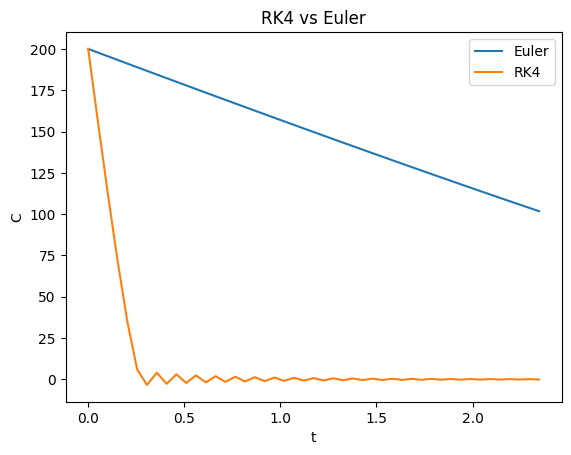

In [ ]:
#graficamos rk4 vs euler
t,Y = Euler_3(h,t_i,t_f,Y_i,F_3)
gr.plot(t,Y,label='Euler')
t,Y = RK4_3(h,t_i,t_f,Y_i,F_3)
gr.plot(t,Y,label='RK4')
gr.xlabel('t')
gr.ylabel('C')
gr.title('RK4 vs Euler')
gr.legend()
gr.show()

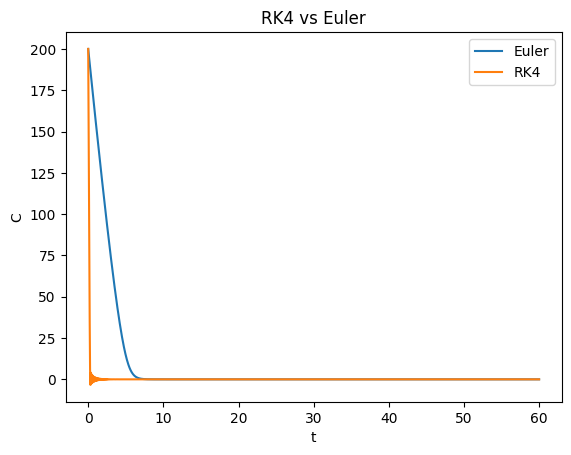

In [ ]:
#graficamos rk4 vs euler en más tiempo
t,Y = Euler_3(h,0,60,Y_i,F_3)
gr.plot(t,Y,label='Euler')
t,Y = RK4_3(h,0,60,Y_i,F_3)
gr.plot(t,Y,label='RK4')
gr.xlabel('t')
gr.ylabel('C')
gr.title('RK4 vs Euler')
gr.legend()
gr.show()

###Error

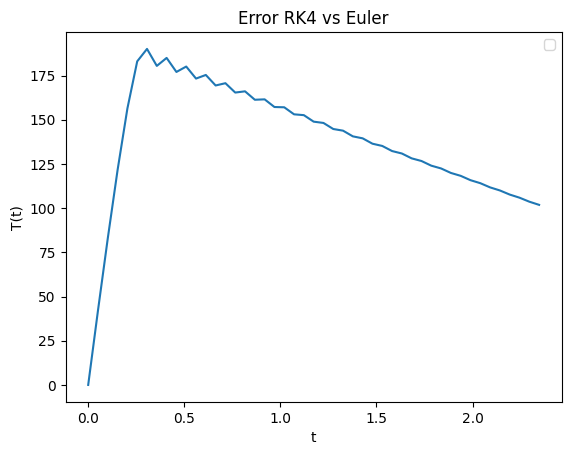

In [ ]:
#Graficamos el error
t,Y = RK4_3(h,t_i,t_f,Y_i,F_3)
t,Y_1 = Euler_3(h,t_i,t_f,Y_i,F_3)
error_3=np.abs(Y-Y_1)
gr.plot(t,error_3)
gr.xlabel('t')
gr.ylabel('T(t)')
gr.legend()
gr.title('Error RK4 vs Euler')
gr.show()

##Analítica vs Euler

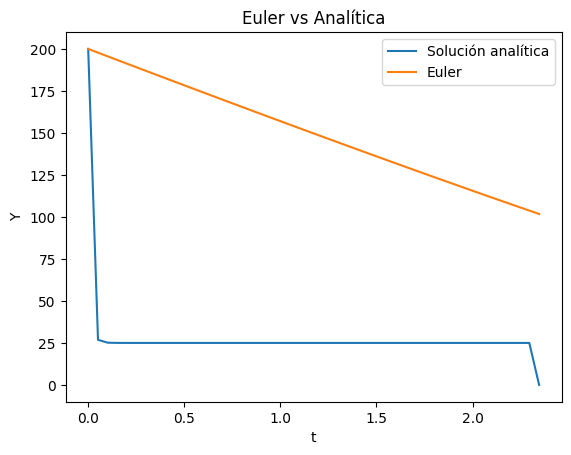

In [ ]:
#graficamos la solución analítica contra euler
t, Y_a = An_3(h,t_i,t_f,Y_i)
gr.plot(t,Y_a,label='Solución analítica')
t,Y = Euler_3(h,t_i,t_f,Y_i,F_3)
gr.plot(t,Y,label='Euler')
gr.xlabel('t')
gr.ylabel('Y')
gr.title('Euler vs Analítica')
gr.legend()
gr.show()

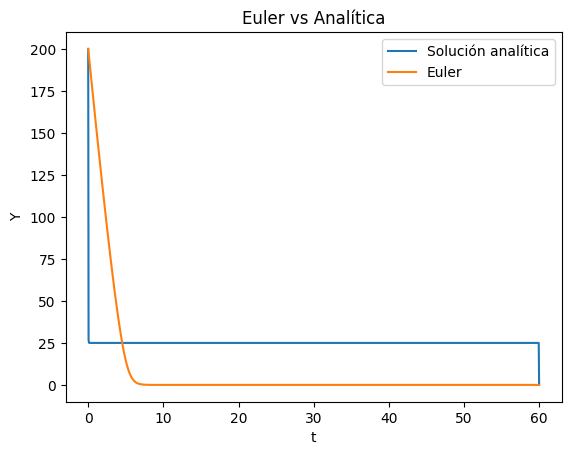

In [ ]:
#graficamos la solución analítica contra euler por más tiempo
t, Y_a = An_3(h,0,60,Y_i)
gr.plot(t,Y_a,label='Solución analítica')
t,Y = Euler_3(h,0,60,Y_i,F_3)
gr.plot(t,Y,label='Euler')
gr.xlabel('t')
gr.ylabel('Y')
gr.title('Euler vs Analítica')
gr.legend()
gr.show()

###Error

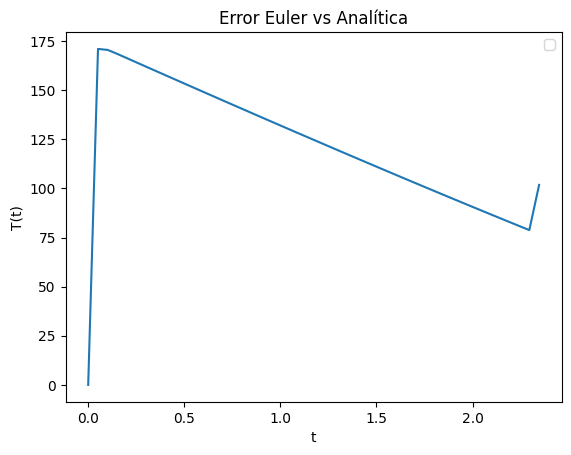

In [ ]:
#Graficamos el error
t,Y = Euler_3(h,t_i,t_f,Y_i,F_3)
t,Y_1 = An_3(h,t_i,t_f,Y_i)
error_3=np.abs(Y-Y_1)
gr.plot(t,error_3)
gr.xlabel('t')
gr.ylabel('T(t)')
gr.legend()
gr.title('Error Euler vs Analítica')
gr.show()

##Analítica vs RK4

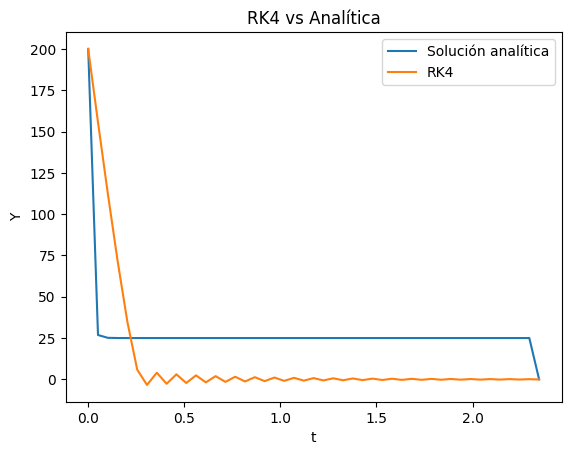

In [ ]:
#graficamos la solución analítica contra RK4
t, Y_a = An_3(h,t_i,t_f,Y_i)
gr.plot(t,Y_a,label='Solución analítica')
t,Y = RK4_3(h,t_i,t_f,Y_i,F_3)
gr.plot(t,Y,label='RK4')
gr.xlabel('t')
gr.ylabel('Y')
gr.title('RK4 vs Analítica')
gr.legend()
gr.show()

###Error

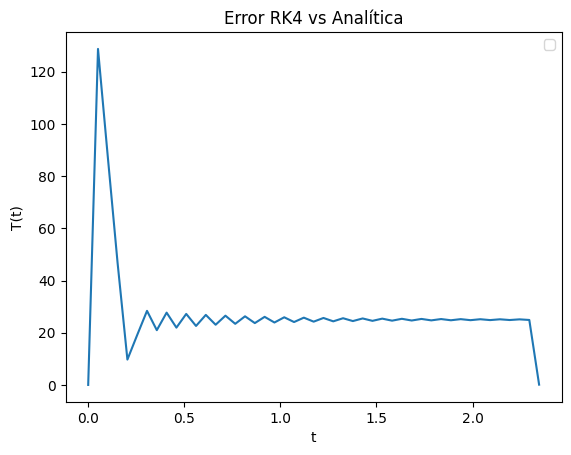

In [ ]:
#Graficamos el error
t,Y = RK4_3(h,t_i,t_f,Y_i,F_3)
t,Y_1 = An_3(h,t_i,t_f,Y_i)
error_3=np.abs(Y-Y_1)
gr.plot(t,error_3)
gr.xlabel('t')
gr.ylabel('T(t)')
gr.legend()
gr.title('Error RK4 vs Analítica')
gr.show()

En este problema, la solución numérica mediante RK4 se acerca más a la solución analítica, puesto que refina más las evaluaciones de la función.